## Imports

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from sklearn.metrics import confusion_matrix

## Chargement du dataset

In [85]:
df = pd.read_csv('dataset.csv')
df = df.dropna(inplace=False)

In [86]:
def resultat(string):
    if string == 'H':
        return 1
    if string == 'D':
        return 0
    if string == 'A':
        return 2

df['FTR'] = df['FTR'].apply(resultat)

In [87]:
df_equipe = df[['HomeTeam', 'AwayTeam', 'FTR']]
df = df.drop(['HomeTeam', 'AwayTeam', 'FTR','HomeFormPtsStr','AwayFormPtsStr','MatchWeek'], axis=1)
#df = df.drop(['Home3GW','Home5GW','Home3GL','Home5GL','Away3GW','Away5GW','Away3GL','Away5GL'], axis=1)
df

,HomeScored,HomeConceded,AwayScored,AwayConceded,HomePoints,AwayPoints,WHH,WHD,WHA,HomeFormPts,AwayFormPts,Home3GW,Home5GW,Home3GL,Home5GL,Away3GW,Away5GW,Away3GL,Away5GL
0,0.0,0.0,0.0,0.0,0,0,1.45,3.50,6.00,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,1.40,3.70,6.50,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,1.65,3.25,4.70,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,1.50,3.40,6.00,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,2.40,2.90,2.75,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,34.0,62.0,36.0,52.0,35,37,2.15,3.50,3.20,4,4,0,0,0,0,0,0,0,0
7338,59.0,38.0,60.0,39.0,68,63,2.10,3.40,3.40,9,10,0,0,0,0,0,0,0,0
7339,54.0,47.0,41.0,76.0,54,31,2.55,3.50,2.62,7,1,0,0,0,0,0,0,0,0
7340,85.0,36.0,35.0,64.0,83,31,1.20,7.00,12.00,9,7,0,0,0,0,0,0,0,0


## Classification

Arbre Décisionel

In [88]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

accuracy_DT = clf_DT.score(X_test, y_test)

<Axes: >

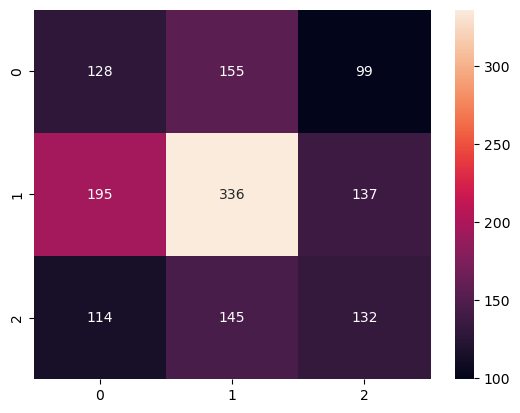

In [89]:
cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm, annot=True, fmt='d')

KNN

In [90]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_KNN = KNeighborsClassifier(n_neighbors=8)
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)

accuracy_KNN = clf_KNN.score(X_test, y_test)

<Axes: >

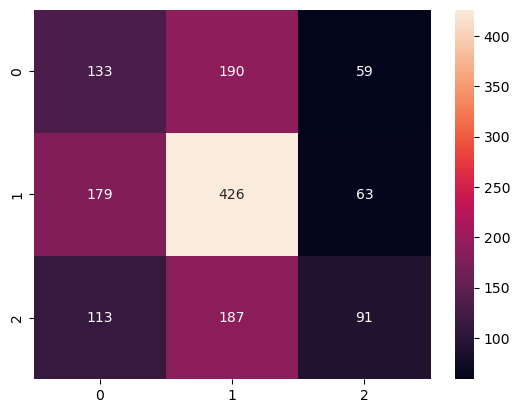

In [91]:
cm = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm, annot=True, fmt='d')

Random Forest

In [92]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

accuracy_RF = clf_RF.score(X_test, y_test)

<Axes: >

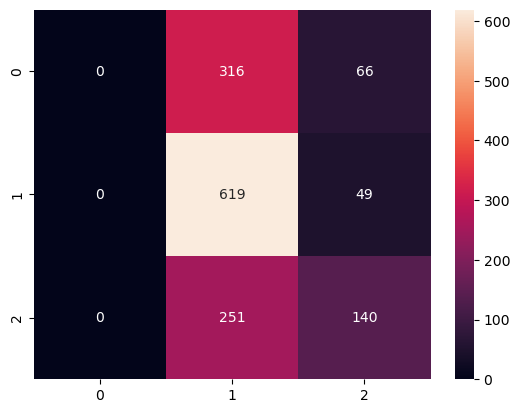

In [93]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt='d')

ConvNet

In [94]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [95]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# redimensionner les données pour convenir à la forme de l'entrée de la couche Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [100]:
# Créer un modèle séquentiel
model = Sequential()
kernel_size = 3

# Ajouter une couche convolutive avec 32 filtres, une fenêtre de convolution de taille 3, une fonction d'activation ReLU
# et une entrée de forme (nombre d'échantillons, longueur de la série, nombre de canaux)
model.add(Conv1D(32, kernel_size, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Ajouter une couche de pooling maximale
model.add(MaxPooling1D())

# Ajouter une autre couche convolutive avec 64 filtres, une fenêtre de convolution de taille 3, une fonction d'activation ReLU
model.add(Conv1D(64, kernel_size, activation='relu'))

# Ajouter une autre couche de pooling maximale
model.add(MaxPooling1D())

# Aplatir les sorties de la couche convolutive précédente en une seule dimension
model.add(Flatten())

# Ajouter une couche dense avec 128 neurones et une fonction d'activation ReLU
model.add(Dense(128, activation='relu'))

# Ajouter une couche de sortie avec une fonction d'activation softmax pour obtenir une prédiction parmi 3 catégories
model.add(Dense(3, activation='softmax'))

# Compiler le modèle en spécifiant la fonction de perte, l'algorithme d'optimisation et la métrique à utiliser
# pour évaluer les performances du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Former le modèle sur les données d'entraînement
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=2)

# Évaluer la performance du modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 17, 32)            128       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 8, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 6, 64)             6208      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 192)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

2023-03-17 11:45:47.613336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 - 1s - loss: 1.1773 - accuracy: 0.4351 - val_loss: 1.0407 - val_accuracy: 0.4631 - 1s/epoch - 15ms/step
Epoch 2/30


2023-03-17 11:45:48.360560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 - 1s - loss: 1.0407 - accuracy: 0.4727 - val_loss: 1.0276 - val_accuracy: 0.4649 - 531ms/epoch - 7ms/step
Epoch 3/30
72/72 - 1s - loss: 1.0350 - accuracy: 0.4709 - val_loss: 1.0865 - val_accuracy: 0.4501 - 589ms/epoch - 8ms/step
Epoch 4/30
72/72 - 1s - loss: 1.0313 - accuracy: 0.4761 - val_loss: 1.0350 - val_accuracy: 0.4614 - 633ms/epoch - 9ms/step
Epoch 5/30
72/72 - 1s - loss: 1.0199 - accuracy: 0.4833 - val_loss: 1.0274 - val_accuracy: 0.4735 - 539ms/epoch - 7ms/step
Epoch 6/30
72/72 - 1s - loss: 1.0231 - accuracy: 0.4857 - val_loss: 1.0283 - val_accuracy: 0.4709 - 564ms/epoch - 8ms/step
Epoch 7/30
72/72 - 1s - loss: 1.0154 - accuracy: 0.4878 - val_loss: 1.0153 - val_accuracy: 0.4840 - 519ms/epoch - 7ms/step
Epoch 8/30
72/72 - 1s - loss: 1.0217 - accuracy: 0.4889 - val_loss: 1.0364 - val_accuracy: 0.4735 - 523ms/epoch - 7ms/step
Epoch 9/30
72/72 - 1s - loss: 1.0139 - accuracy: 0.4902 - val_loss: 1.0264 - val_accuracy: 0.4709 - 520ms/epoch - 7ms/step
Epoch 10/30
72/72 - 1s - lo

In [101]:
y_pred_CNN = model.predict(X_test, verbose=0)

2023-03-17 11:47:04.499346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


SVM :

In [102]:
from sklearn.svm import SVC

X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_SVM = SVC(kernel = 'rbf',random_state = 0)
clf_SVM.fit(X_train, y_train)

y_pred_SVM = clf_SVM.predict(X_test)

accuracy_SVM = clf_SVM.score(X_test, y_test)

<Axes: >

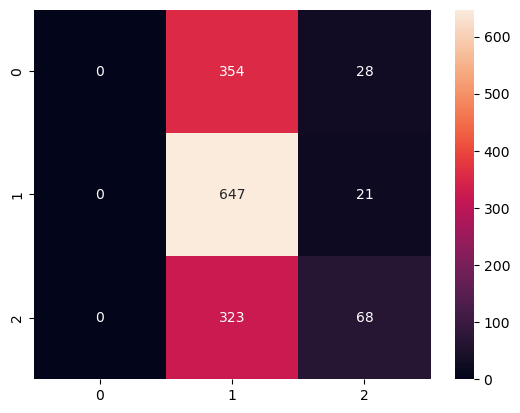

In [103]:
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot=True, fmt='d')

## Résultats

In [104]:
print("Précision du DecisionTreeClassifier:", accuracy_DT)
print("Précision du KNeighborsClassifier:", accuracy_KNN)
print("Précision du RandomForestClassifier:", accuracy_RF)
print("Précision du SVM:", accuracy_SVM)
print("Précision du CNN:", test_acc)

Précision du DecisionTreeClassifier: 0.41360166551006244
Précision du KNeighborsClassifier: 0.45107564191533656
Précision du RandomForestClassifier: 0.5267175572519084
Précision du SVM: 0.4961832061068702
Précision du CNN: 0.4906315207481384


In [105]:
df_final = pd.DataFrame()
df_final['Résultat'] = y_test
df_final['Prédiction'] = y_pred_RF
df_final = pd.merge(df_equipe[['HomeTeam', 'AwayTeam']].reset_index(), df_final.reset_index(), on='index')
df_final['Résultat'] = df_final['Résultat'].astype('int')
df_final = df_final.drop(['index'], axis=1)
df_final

,HomeTeam,AwayTeam,Résultat,Prédiction
0,Guingamp,St Etienne,0,1
1,Lille,Rennes,1,1
2,Lens,Toulouse,1,1
3,St Etienne,Bordeaux,1,1
4,Troyes,Auxerre,1,1
...,...,...,...,...
1436,Strasbourg,Clermont,1,1
1437,Troyes,Lens,2,2
1438,Clermont,Lyon,2,2
1439,Lille,Rennes,0,2


## Statistiques

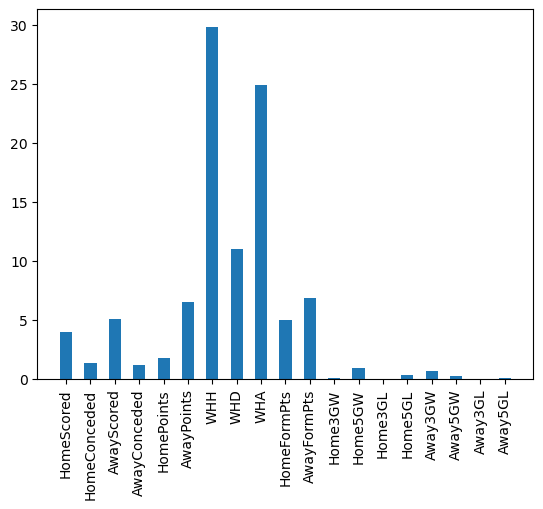

In [106]:
nb_deb = 0
nb_fin = 100

plt.bar(x=df.columns[nb_deb:nb_fin],height=clf_RF.feature_importances_[nb_deb:nb_fin]*100,width=0.5,bottom=None, align='center')
plt.xticks(range(len(df.columns[nb_deb:nb_fin])), df.columns[nb_deb:nb_fin], rotation='vertical')
plt.show()